In [1]:
import os
import csv
import pandas as pd
import numpy as np
from numpy import fft
from scipy.fftpack import fft
from scipy.fft import fft, fftfreq
# import scipy.integrate as spi
import matplotlib
from  matplotlib import pyplot as plt
# import librosa
from ipywidgets import interact, fixed, FloatSlider
import IPython.display as ipd
from sklearn import preprocessing
from BaselineRemoval import BaselineRemoval
from scipy import sparse
from scipy.sparse.linalg import spsolve
import datetime
import time
# import mysql.connector
# from mysql.connector import Error
%matplotlib inline
import serial
import serial.tools.list_ports
from matplotlib.animation import FuncAnimation
from itertools import count

In [ ]:
def find_ports():
    names = serial.tools.list_ports.comports()
    return names

In [ ]:
def get_ports(found_ports):
    ls = []
    for p in ports:
        ls.append(str(p))
    matches = [match for match in ls if "usbserial" in match]
    return matches

In [ ]:
match_ports = []
PORTS=[]
ports = find_ports()
match_ports = get_ports(ports)
port1 = match_ports[0].split()
PORTS.append(port1[0])
print(PORTS[0])

In [ ]:
PORT1 = '/dev/ttyUSB0'                   
BAUD_RATES1 = 115200  
ser1 = serial.Serial(PORT1,BAUD_RATES1)

In [ ]:
PORT2 = '/dev/ttyUSB1'                   
BAUD_RATES2 = 115200  
ser2 = serial.Serial(PORT2,BAUD_RATES2)

In [ ]:
PORT3 = PORTS[0]                 
BAUD_RATES3 = 115200  
ser3 = serial.Serial(PORT3,BAUD_RATES3)

In [ ]:
# def animate(i):
#     x_values.append(next(index))
#     plt.cla()
#     plt.plot(x_values, DATA3_percentil_90)

In [2]:
#fake live streaming data
data_arr = []
data_arry = []
data_arryR = []

In [3]:
with open('1012_kc_nano1_result_3.csv','rt') as csvfile:
    rows = csv.reader(csvfile)
    df=pd.read_csv(r'./1012_kc_nano1_result_3.csv')
    for row in rows:
          data_arr.append(row)
    for i in range(0, len(df)+1):
        data_arry.append(float(data_arr[i][4]))
        data_arryR.append(float(data_arr[i][4]))

In [4]:
print(len(data_arry))
print(len(data_arryR))

300000
300000


<IPython.core.display.Javascript object>


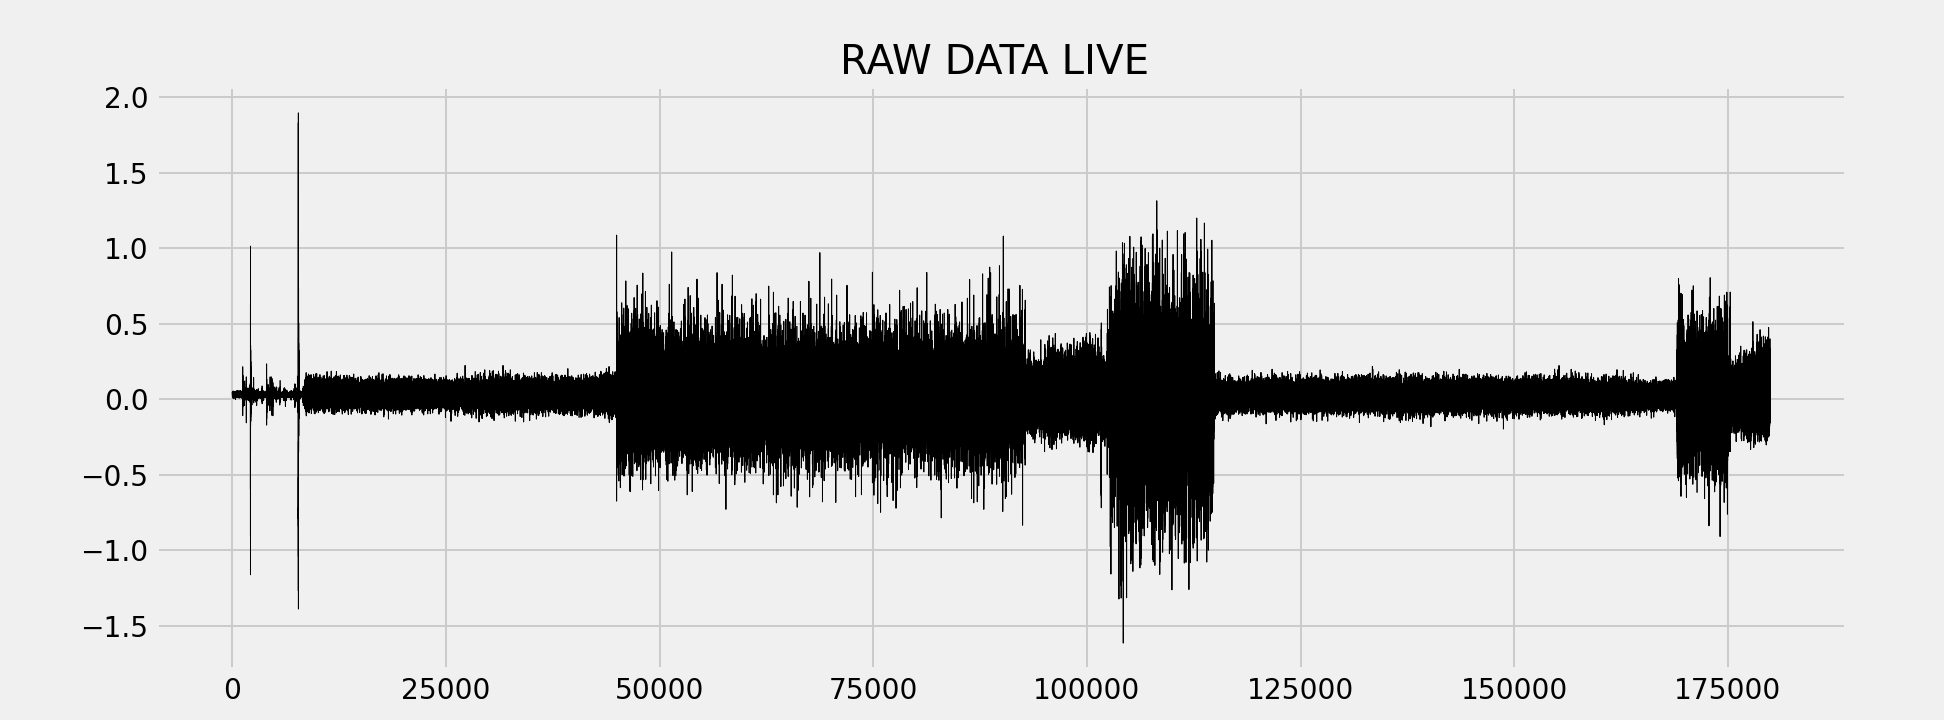

<IPython.core.display.Javascript object>


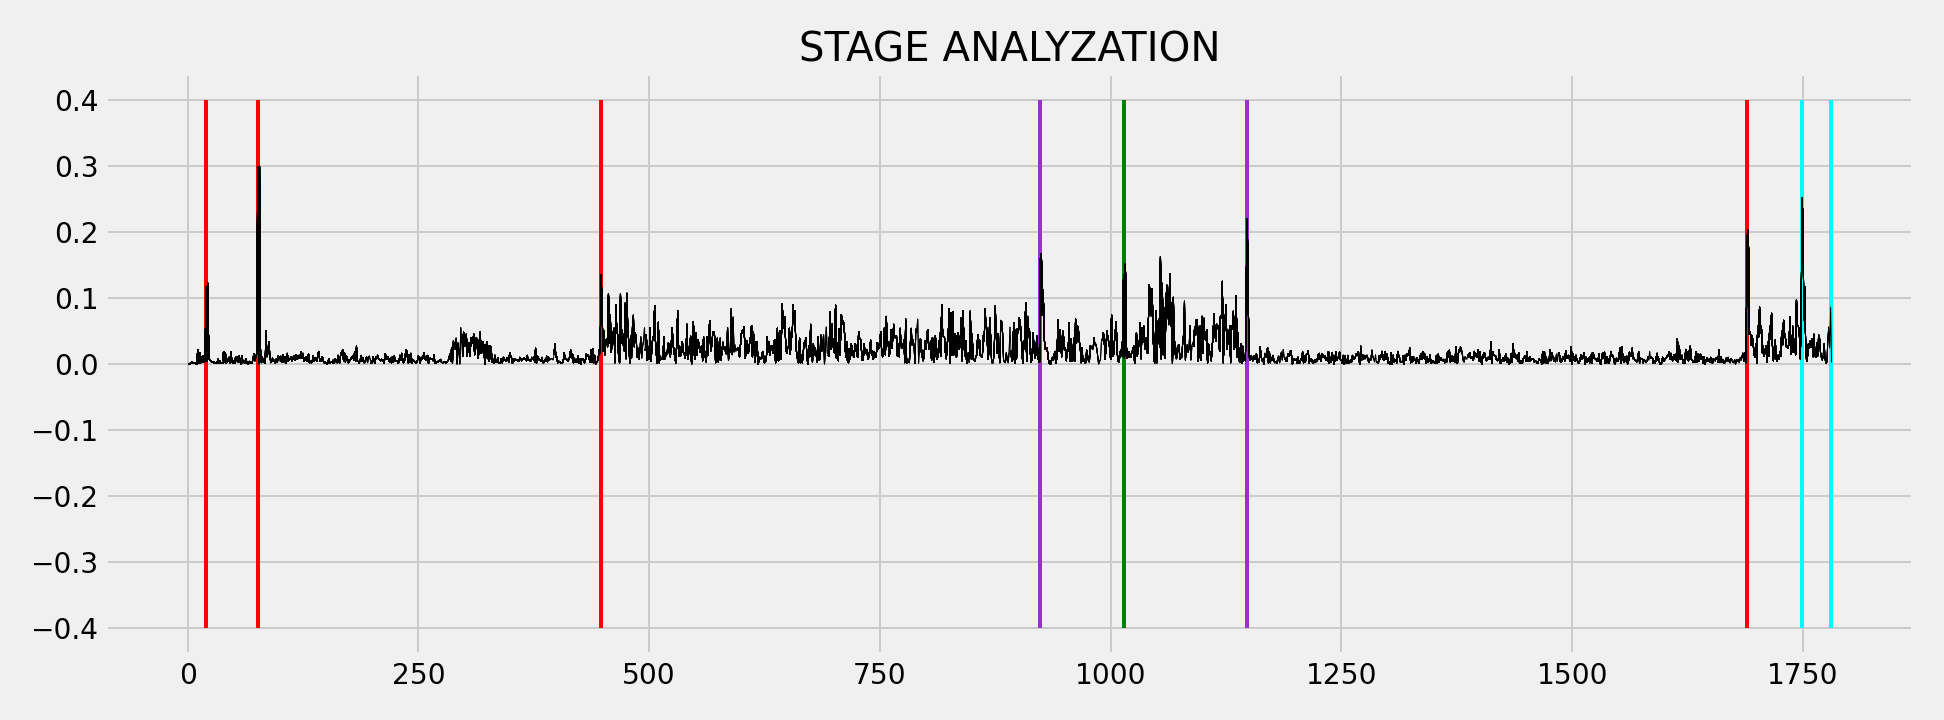

<bound method Figure.show of <Figure size 972x360 with 1 Axes>>

In [5]:
#plotting data
%matplotlib notebook
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize = (13.5,5))
ax = fig.add_subplot(111)
ax.title.set_text("RAW DATA LIVE ")
ax.hlines(0,0,1,color="k", linewidth=0.1)

fig2 = plt.figure(figsize = (13.5,5))
ax2 = fig2.add_subplot(111)
ax2.title.set_text("STAGE ANALYZATION")
ax2.hlines(0,0,1,color="k", linewidth=0.1)


fig.show()
fig2.show

In [6]:


#flush serial input
# ser1.flushInput()
# ser2.flushInput()
# ser3.flushInput()

#100 points to 1 point => 1 second 1 point
# DATA1_100 = []
# DATA2_100 = []
DATA3_100 = []

#A list to calculate baseline removal 
# DATA1_BASELINE=[]
# DATA2_BASELINE=[]
DATA3_BASELINE=[]

#A list to save the 90% data of the DATA3_100 list
# DATA1_percentile_90 = []
# DATA2_percentile_90 = []
DATA3_percentile_90 = []

#False means the stage hasn't change
#state1 = False
#state2 = False
state3r = False
state3b = False
state3d = False
state3ac = False

#counter for differeniated data (dif_y3)
# d1 = 2
# d2 = 2
d3 = 2

#counter for x3 
# count1 = 1
# count2 = 1
count3 = 1

x3=[]#plotting x
dif_y3 =[]#plotting y
dif3_10 = []

count3_raw2 = 1#counter for clearing the list
count3_raw = 1#counter for appending data
raw3=[]#copying the raw data from the original data set, plotting raw y
x3_raw=[]#counts of x axis, plotting raw x
# x1=[]
# x2=[]


# dif_y1 = []
# dif1_10 = []

# dif_y2 = []
# dif2_10 = []



#baslineing the raw data
polynomial_degree = 2 #only needed for Modpoly and IModPoly algorithm
baseObj1 = BaselineRemoval(data_arryR)        
y3_raw3 = baseObj1.IModPoly(polynomial_degree)

i = 0
#calcualte the baseline removal values 
while (len(DATA3_BASELINE) < 1000):
#     data_raw3 = ser3.readline()
#     data3 = data_raw3.decode().split()
#     if len(data3) ==5:
    DATA3_BASELINE.append(float(data_arry[120000+i]))
    i+=1
    if (len(DATA3_BASELINE) == 1000):
        polynomial_degree = 2 #only needed for Modpoly and IModPoly algorithm
        baseObj = BaselineRemoval(DATA3_BASELINE)        
        base_line = baseObj.IModPoly(polynomial_degree)
        removal = DATA3_BASELINE-np.mean(base_line)
#live streaming data and plotting
i=0

while True:
#     data_raw3 = ser3.readline()
#     data3 = data_raw3.decode()
#     if len(data3.split())==5:#filter out abnormal data
#     dataraw3 = data3.split()

    x3_raw.append(count3_raw)
    raw3.append(float(y3_raw3[120000+count3_raw-1]))
    count3_raw+=1
    count3_raw2+=1
    if count3_raw2 == 100:
        ax.plot(x3_raw,raw3,color = 'k',linewidth=0.5)
        fig.canvas.draw()
#         plt.clf()
        count3_raw2 = 1
        count3_raw-=1
        raw3.clear()
        x3_raw.clear()
    
    if len(DATA3_100) < 100:# filling queue
        if isinstance(float(data_arry[i+120000]),float):#filter out data that are not normal
            DATA3_100.append(float(data_arry[i+120000])-removal)
            i+=1
            
    elif len(DATA3_100) == 100:#find the 90% of the DATA3_100 and append it into DATA3_percentile_90
        DATA3_percentile_90.append(np.percentile(DATA3_100, 90))
        DATA3_100 = []
        
        if len(DATA3_percentile_90)>2:
            seconds = time.time()
            dif_y3.append(abs(DATA3_percentile_90[d3]-DATA3_percentile_90[d3-2]))
            x3.append(count3)
            count3+=1
            ax2.plot(x3,dif_y3,color = 'k',linewidth=0.5)
            fig2.canvas.draw()
#             print(time.ctime())
            
            if len(dif3_10)<10:
                dif3_10.append(abs(DATA3_percentile_90[d3-1]-DATA3_percentile_90[d3-3]))
            else:
                dif3_10.pop(0)
                dif3_10.append(abs(DATA3_percentile_90[d3-1]-DATA3_percentile_90[d3-3]))
            dif3_mean = np.mean(dif3_10)
            dif3_mid = np.percentile(dif3_10, 50)
            
            if abs(DATA3_percentile_90[d3]-DATA3_percentile_90[d3-2])/dif3_mean > 4 and DATA3_percentile_90[d3]>0.13 and DATA3_percentile_90[d3-1]<0.13:# and DATA3_percentile_90[d3]>0.13 and DATA3_percentile_90[d3-1]<0.13 : #bang and rinse to wash
                print("red"+str(abs(DATA3_percentile_90[d3]-DATA3_percentile_90[d3-2])/dif3_mean)+"  "+str(d3))
                ax2.vlines(d3-1,-0.4,0.4,color="red", linewidth=2)
                fig.canvas.draw()
#                 if not state3r: 
#                     ax2.vlines(d3-1,-0.4,0.4,color="red", linewidth=2)
#                     fig.canvas.draw()
#                     state3r = True
#                 else:
#                     state3r = False
        
            if (abs(DATA3_percentile_90[d3]-DATA3_percentile_90[d3-2])-dif3_mean) > 0.1 and DATA3_percentile_90[d3]<0.075 and DATA3_percentile_90[d3-1]>0.075:#
                print("greean"+str(abs(DATA3_percentile_90[d3]-DATA3_percentile_90[d3-2])-dif3_mean)+"  "+str(d3))
                ax2.vlines(d3-1,-0.4,0.4,color="green", linewidth=2)
                fig2.canvas.draw()
#                 if not state3b:   
#                     ax2.vlines(d3-1,-0.4,0.4,color="green", linewidth=2)
#                     fig2.canvas.draw()
#                     state3b = True
#                 else:
#                     state3b = False
                    
            if (abs(DATA3_percentile_90[d3]-DATA3_percentile_90[d3-2])-dif3_mean) > 0.05 and DATA3_percentile_90[d3]<0.15 and DATA3_percentile_90[d3-1]>0.15:
                print("aqua"+str(abs(DATA3_percentile_90[d3]-DATA3_percentile_90[d3-2])/dif3_mean)+"  "+str(d3))
                ax2.vlines(d3-1,-0.4,0.4,color="aqua", linewidth=2)
                fig2.canvas.draw()
#                 if not state3ac: 
#                     ax2.vlines(d3-1,-0.4,0.4,color="aqua", linewidth=2)
#                     fig2.canvas.draw()
#                     state3ac = True
#                 else:
#                     state3ac = False 
                    
            if (abs(DATA3_percentile_90[d3]-DATA3_percentile_90[d3-2])/dif3_mean) > 6 and DATA3_percentile_90[d3]<0.075 and DATA3_percentile_90[d3-1]>0.075:
                print("darkorchid"+str(abs(DATA3_percentile_90[d3]-DATA3_percentile_90[d3-2])/dif3_mean)+"  "+str(d3))
                ax2.vlines(d3-1,-0.4,0.4,color="darkorchid", linewidth=2)
                fig2.canvas.draw()
#                 if not state3d: 
#                     ax2.vlines(d3-1,-0.4,0.4,color="darkorchid", linewidth=2)
#                     fig2.canvas.draw()
#                     state3d = True
#                 else:
#                     state3d = False
                    
            


            d3+=1
            
            if len(x3)==100:
#                 plt.clf()
                count3-=1
                d3-=1
                dif_y3.clear()
                x3.clear()
                
            plt.tight_layout()
            plt.show()

red15.810810810810803  21
red45.15151515151513  77
red13.917525773195878  449
greean0.14229999999999998  925
aqua9.039548022598868  925
darkorchid9.039548022598868  925
greean0.10940000000000001  1015
greean0.19297999999999882  1149
aqua8.142116950406754  1149
darkorchid8.142116950406754  1149
red12.743589743600209  1690
greean0.2056  1750
aqua5.528634361233479  1750
aqua4.550264550264555  1781


IndexError: list index out of range

In [ ]:
x3_raw=[]
raw3 = []
count3_raw = 1
count3_raw2 = 1
polynomial_degree = 2 #only needed for Modpoly and IModPoly algorithm
baseObj1 = BaselineRemoval(data_arryR)        
y3_raw3 = baseObj1.IModPoly(polynomial_degree)
while True:
    x3_raw.append(count3_raw)
    raw3.append(float(y3_raw3[120000+count3_raw-1]))
    count3_raw+=1
    count3_raw2 +=1
    if count3_raw2 == 100:
        ax.plot(x3_raw,raw3,color = 'k',linewidth=0.5)
        fig.canvas.draw()
        plt.clf()
        count3_raw2 = 1
        count3_raw-=1
        raw3.clear()
        x3_raw.clear()

In [ ]:
import random
from itertools import count
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.style.use('fivethirtyeight')

x_values = []
y_values = []

index = count()


def animate(i):
    x_values.append(next(index))
    y_values.append(random.randint(0, 5))
    plt.cla()
    plt.plot(x_values, y_values)


ani = FuncAnimation(plt.gcf(), animate, 1000)


plt.tight_layout()
plt.show()

In [ ]:
import time
from matplotlib import pyplot as plt
import numpy as np

def live_update_demo(blit = False):
    x = np.linspace(0,50., num=100)
    X,Y = np.meshgrid(x,x)
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2)

    img = ax1.imshow(X, vmin=-1, vmax=1, interpolation="None", cmap="RdBu")


    line, = ax2.plot([], lw=3)
    text = ax2.text(0.8,0.5, "")

    ax2.set_xlim(x.min(), x.max())
    ax2.set_ylim([-1.1, 1.1])

    fig.canvas.draw()   # note that the first draw comes before setting data 


    if blit:
        # cache the background
        axbackground = fig.canvas.copy_from_bbox(ax1.bbox)
        ax2background = fig.canvas.copy_from_bbox(ax2.bbox)

    plt.show(block=False)


    t_start = time.time()
    k=0.

    for i in np.arange(100000):
        img.set_data(np.sin(X/3.+k)*np.cos(Y/3.+k))
        line.set_data(x, np.sin(x/3.+k))
        tx = 'Mean Frame Rate:\n {fps:.3f}FPS'.format(fps= ((i+1) / (time.time() - t_start)) ) 
        text.set_text(tx)
        #print tx
        k+=0.11
        if blit:
            # restore background
            fig.canvas.restore_region(axbackground)
            fig.canvas.restore_region(ax2background)

            # redraw just the points
            ax1.draw_artist(img)
            ax2.draw_artist(line)
            ax2.draw_artist(text)

            # fill in the axes rectangle
            fig.canvas.blit(ax1.bbox)
            fig.canvas.blit(ax2.bbox)

            # in this post http://bastibe.de/2013-05-30-speeding-up-matplotlib.html
            # it is mentionned that blit causes strong memory leakage. 
            # however, I did not observe that.

        else:
            # redraw everything
            fig.canvas.draw()

        fig.canvas.flush_events()
        #alternatively you could use
        #plt.pause(0.000000000001) 
        # however plt.pause calls canvas.draw(), as can be read here:
        #http://bastibe.de/2013-05-30-speeding-up-matplotlib.html


live_update_demo(True)   # 175 fps


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2 * np.pi, 100)

fig, ax = plt.subplots()

# animated=True tells matplotlib to only draw the artist when we
# explicitly request it
(ln,) = ax.plot(x, np.sin(x), animated=True)

# make sure the window is raised, but the script keeps going
plt.show(block=False)
fig.canvas.draw()
# stop to admire our empty window axes and ensure it is rendered at
# least once.
#
# We need to fully draw the figure at its final size on the screen
# before we continue on so that :
#  a) we have the correctly sized and drawn background to grab
#  b) we have a cached renderer so that ``ax.draw_artist`` works
# so we spin the event loop to let the backend process any pending operations
plt.pause(0.1)

# get copy of entire figure (everything inside fig.bbox) sans animated artist
bg = fig.canvas.copy_from_bbox(fig.bbox)
# draw the animated artist, this uses a cached renderer
ax.draw_artist(ln)
# show the result to the screen, this pushes the updated RGBA buffer from the
# renderer to the GUI framework so you can see it
fig.canvas.blit(fig.bbox)

for j in range(100000):
    # reset the background back in the canvas state, screen unchanged
    fig.canvas.restore_region(bg)
    # update the artist, neither the canvas state nor the screen have changed
    ln.set_ydata(np.sin(x + (j / 100) * np.pi))
    # re-render the artist, updating the canvas state, but not the screen
    ax.draw_artist(ln)
    # copy the image to the GUI state, but screen might not be changed yet
    fig.canvas.blit(fig.bbox)
    # flush any pending GUI events, re-painting the screen if needed
    fig.canvas.flush_events()
    # you can put a pause in if you want to slow things down
    # plt.pause(.1)

In [ ]:
print(removal)